In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.max_open_warning'] = 0
import numpy as np
#import pandas as pd
df3 = pd.read_table(r"D:\Yuliya_test_data_table\Yuliya_test_data_table_deconv-only_3prime.txt", delimiter = '\t')#, nrows=2)
df5 = pd.read_table(r"D:\Yuliya_test_data_table\Yuliya_test_data_table_deconv-only.txt", delimiter = '\t')#, nrows=2)
#how many unique dna seq
unique_sequences = set()



# 3'

In [2]:
dfclean3 = df3.copy()
#keep this order because I went through the output file individually to determine these lines
dfclean3 = dfclean3[~dfclean3.index.isin(range(32629, 32917))] #122
dfclean3 = dfclean3[~dfclean3.index.isin(range(33826, 34687))] #126, 127, 128
dfclean3 = dfclean3[~dfclean3.index.isin(range(34943, 35494))] #130, 131
dfclean3 = dfclean3[~dfclean3.index.isin(range(35757, 36008))] #133
dfclean3 = dfclean3[~dfclean3.index.isin(range(37729, 37949))] #140
dfclean3 = dfclean3[~dfclean3.index.isin(range(38234, 38463))] #142
dfclean3 = dfclean3[~dfclean3.index.isin(range(38972, 39559))] #145, 146
dfclean3 = dfclean3[~dfclean3.index.isin(range(45581, 48310))] #170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182
dfclean3 = dfclean3[~(dfclean3.index >= 111952)] #the rest

pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Disable column width wrapping

# Print the entire dataframe
#print(dfclean3)
#dfclean2.to_excel('C:/Users/Administrator/Desktop/dfclean3.xlsx', index=False)

In [3]:
unique_sequences = set()
# Iterate over the DNA sequence column and add each unique sequence to the set
for sequence in dfclean3['IB']:
    if sequence not in unique_sequences:
        unique_sequences.add(sequence)

# Print the number of unique sequences
print(f"There are {len(unique_sequences)} unique DNA sequences in the 'dna_sequence' column.")

There are 106236 unique DNA sequences in the 'dna_sequence' column.


## generate dict of dataframes, one for each plate, showing count per well

In [4]:
# Group the dataframe by 'plate' and 'well' and count the occurrences
grouped3 = dfclean3.groupby(['plate', 'well']).size()
grouped3df = grouped3.reset_index().rename(columns={0:'count'})
#print(type(grouped3df))
#print(grouped3df.columns)
#print(grouped3)

In [5]:
grouped3df['wellLet'] = grouped3df['well'].str.extract('([A-Za-z]+)')
grouped3df['wellLet2'] = grouped3df['well'].str.extract('([A-Za-z]+)')
grouped3df['wellNo'] = grouped3df['well'].str.extract('(\d+)').astype(int)
grouped3df['platenum'] = grouped3df['plate'].str.extract('(\d+)').astype(int)
print(grouped3df.columns)


Index(['plate', 'well', 'count', 'wellLet', 'wellLet2', 'wellNo', 'platenum'], dtype='object')


In [6]:
grouped3dfs = {}
for pattern, group in grouped3df.groupby('platenum'):
    grouped3dfs[pattern] = group
#print(grouped3dfs)
print(type(grouped3dfs))

<class 'dict'>


## Plot readcounts per plate

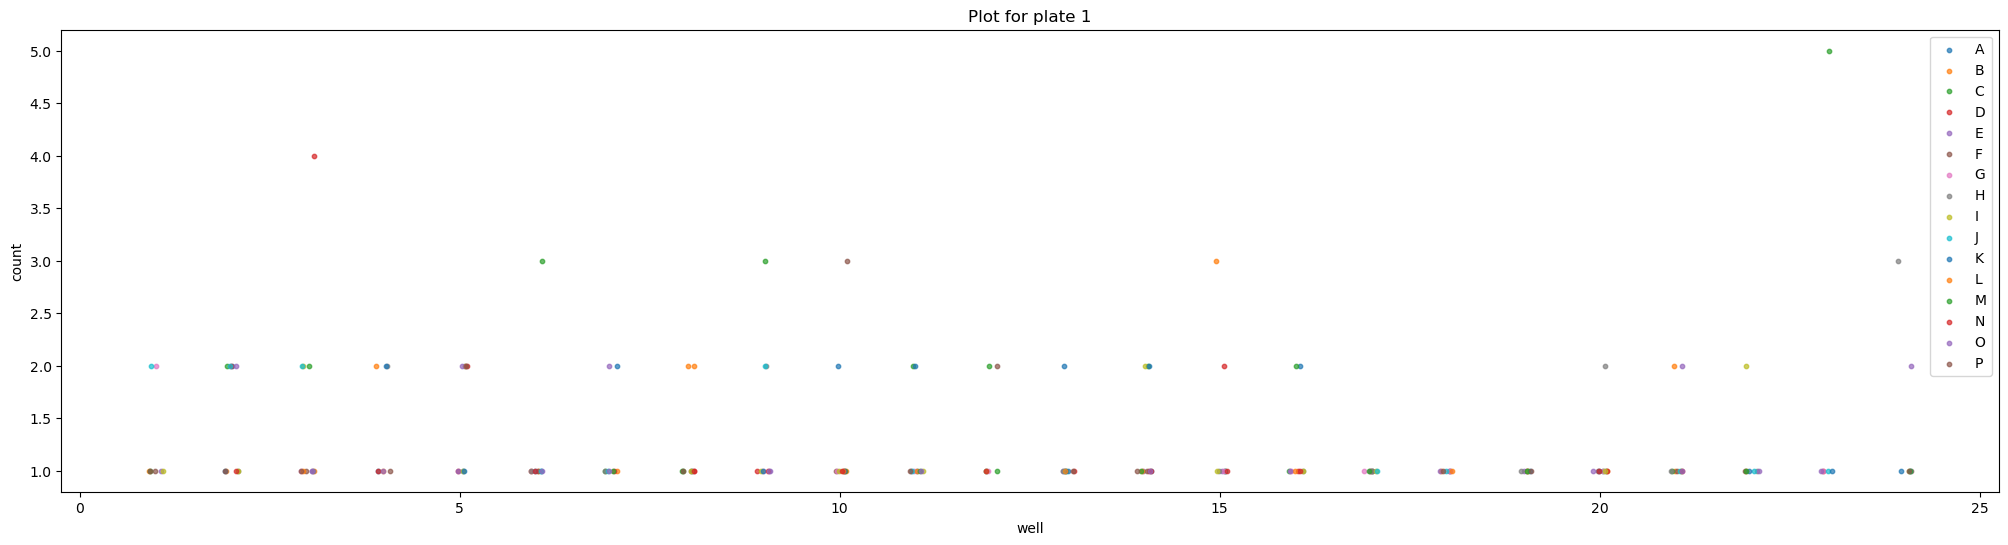

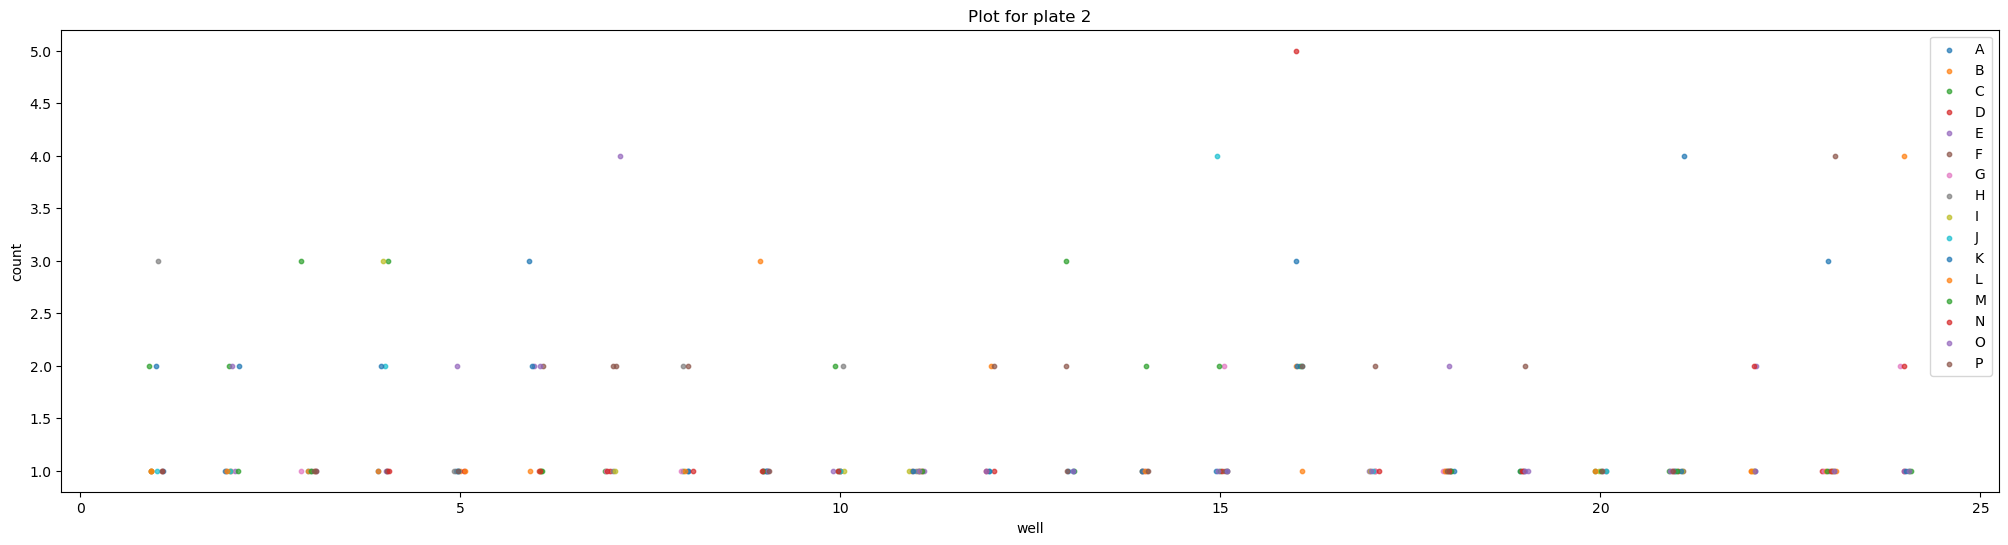

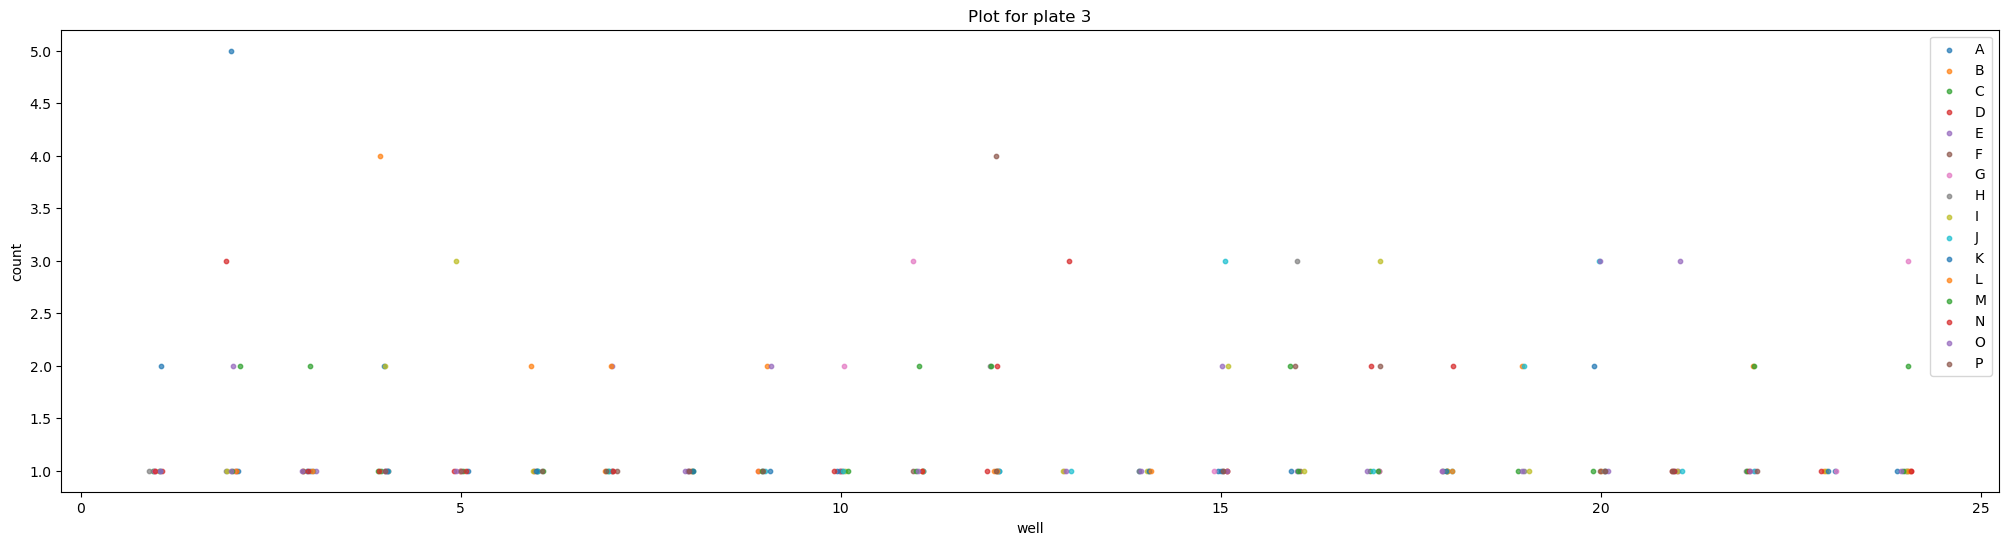

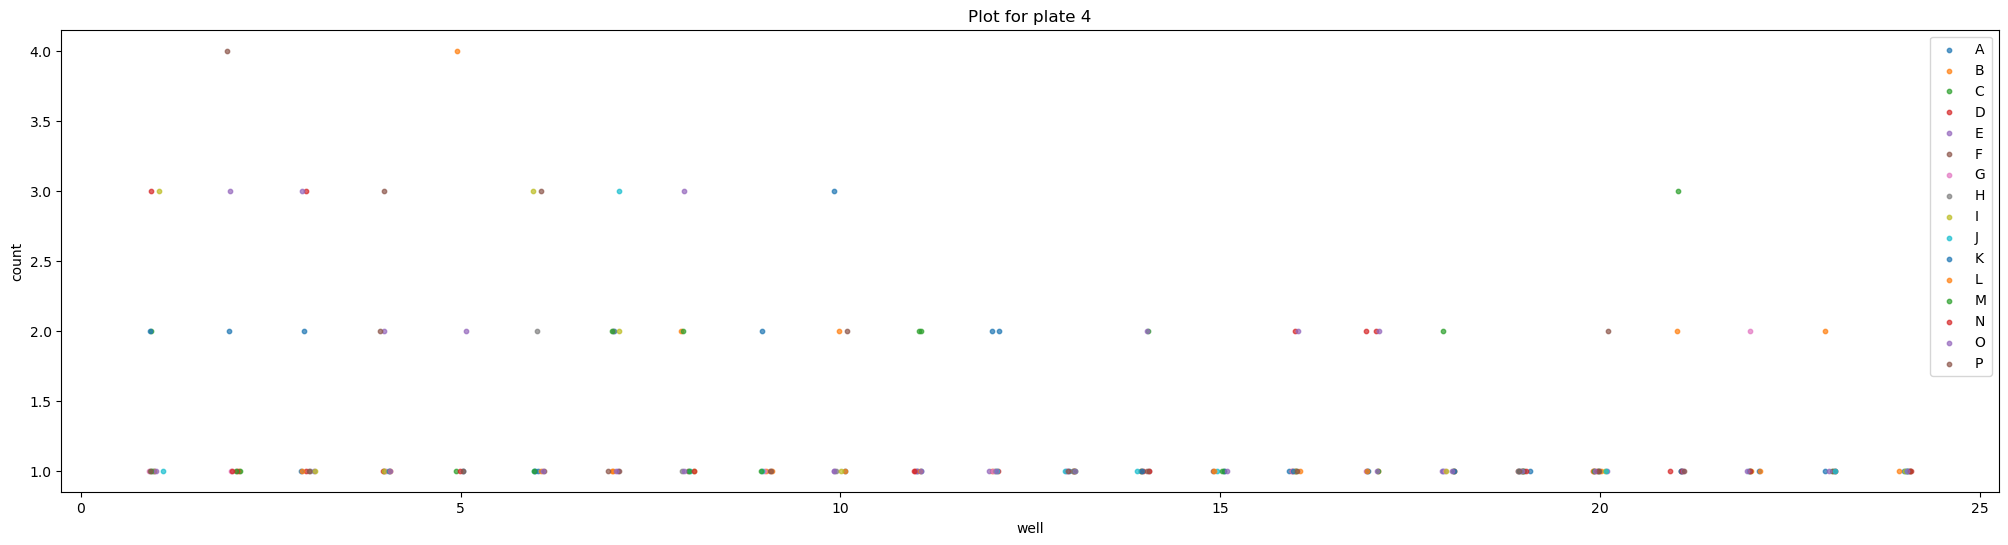

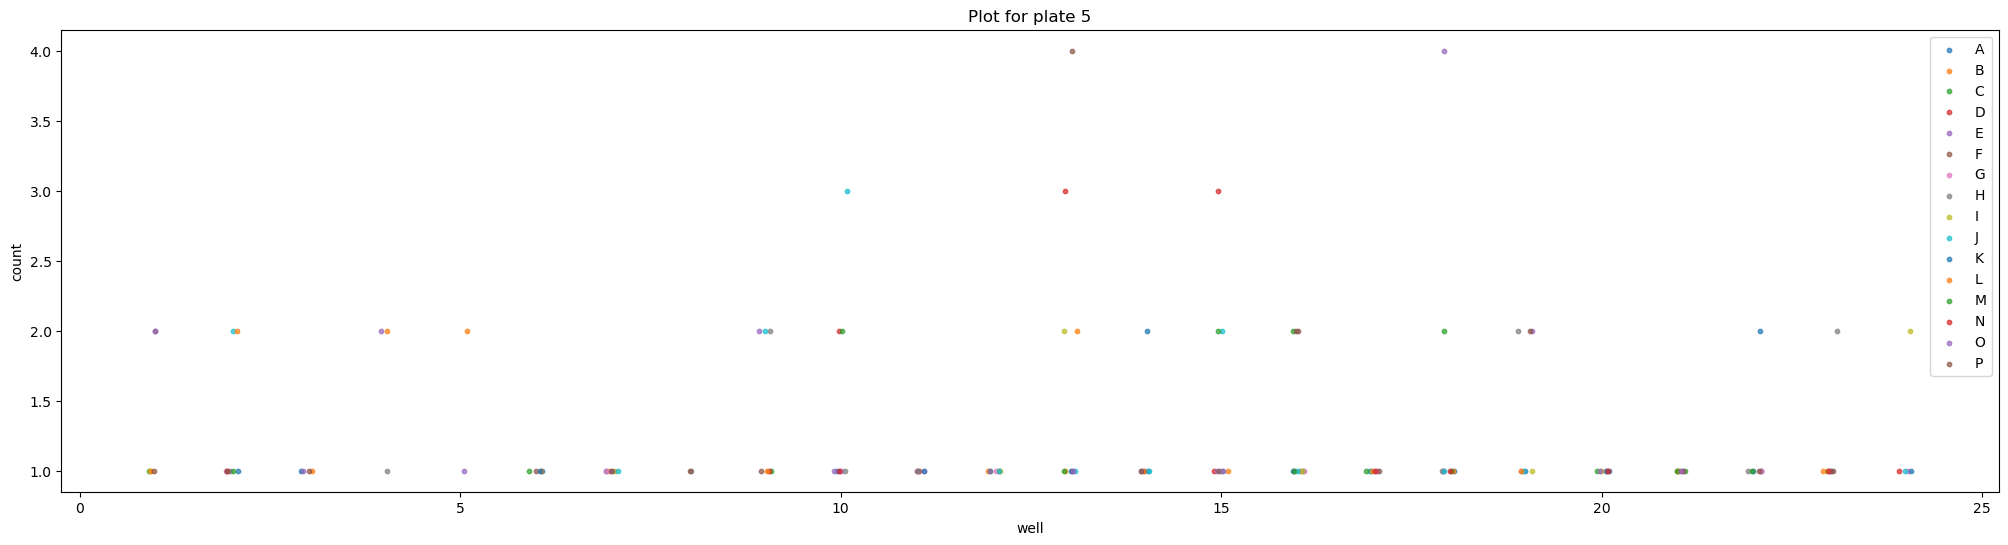

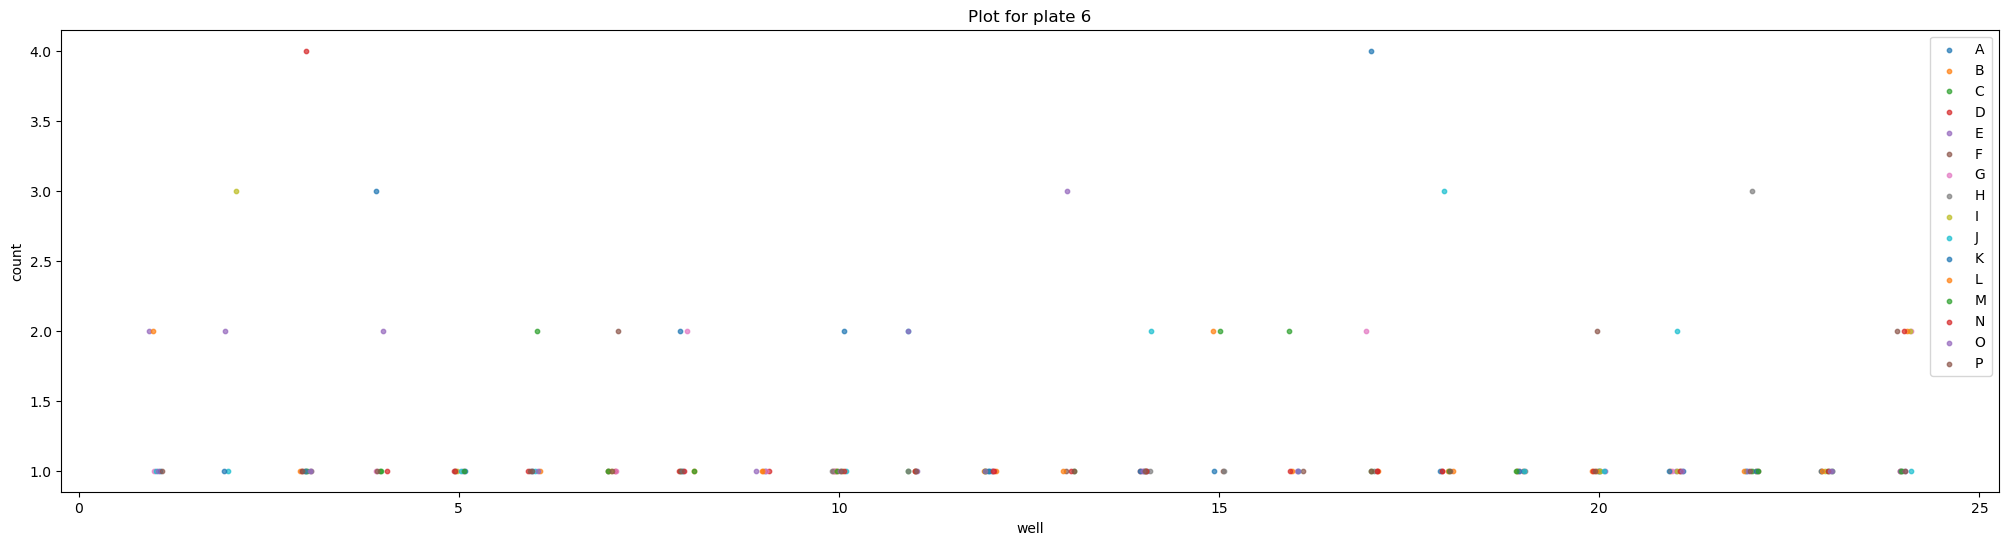

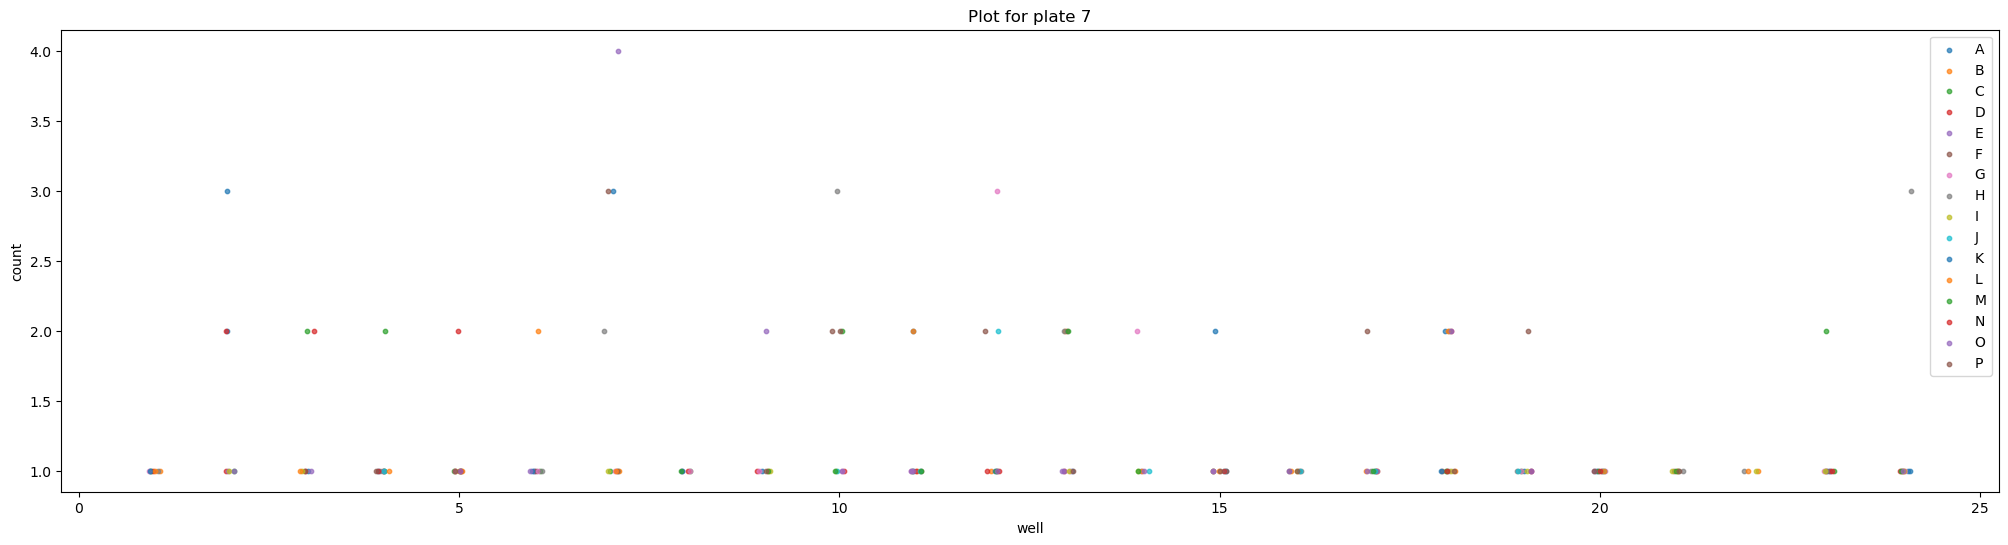

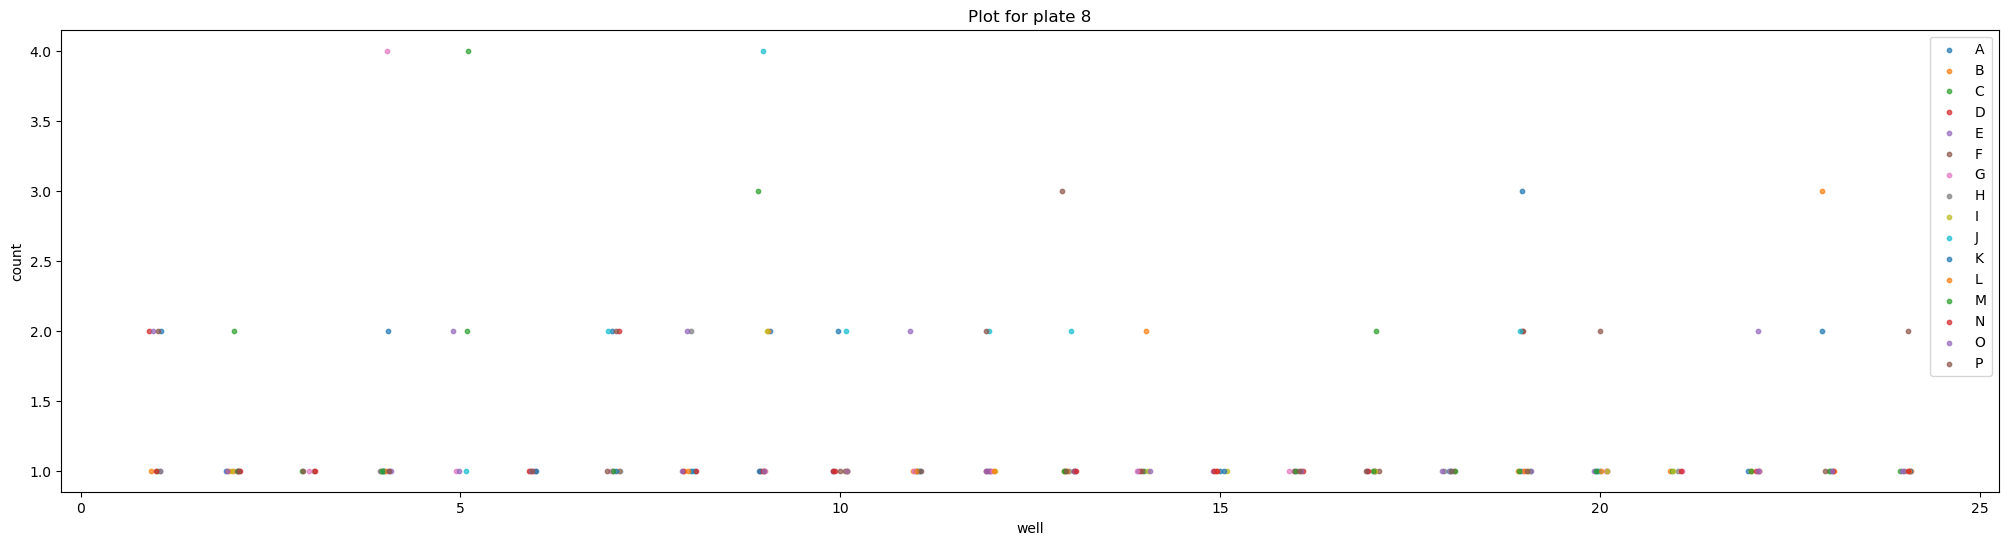

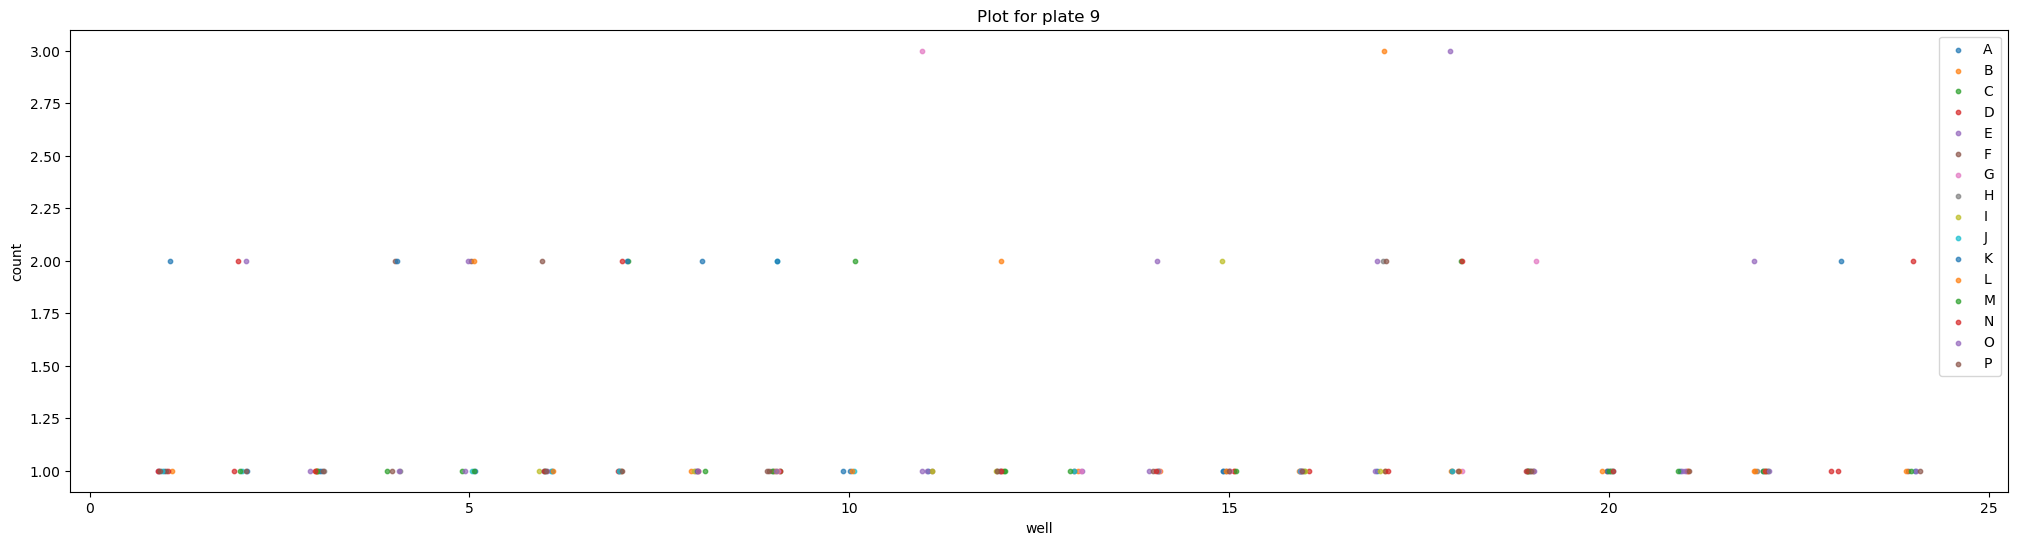

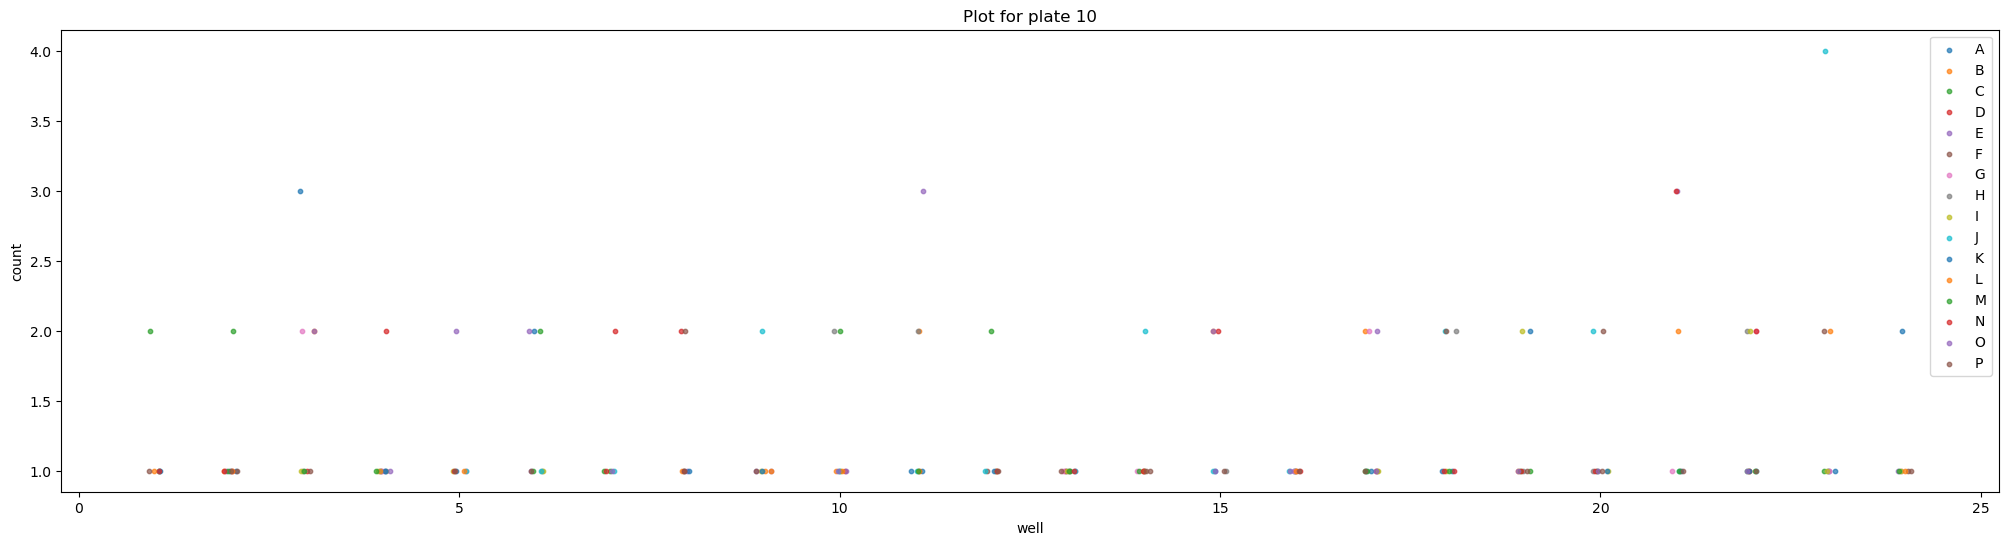

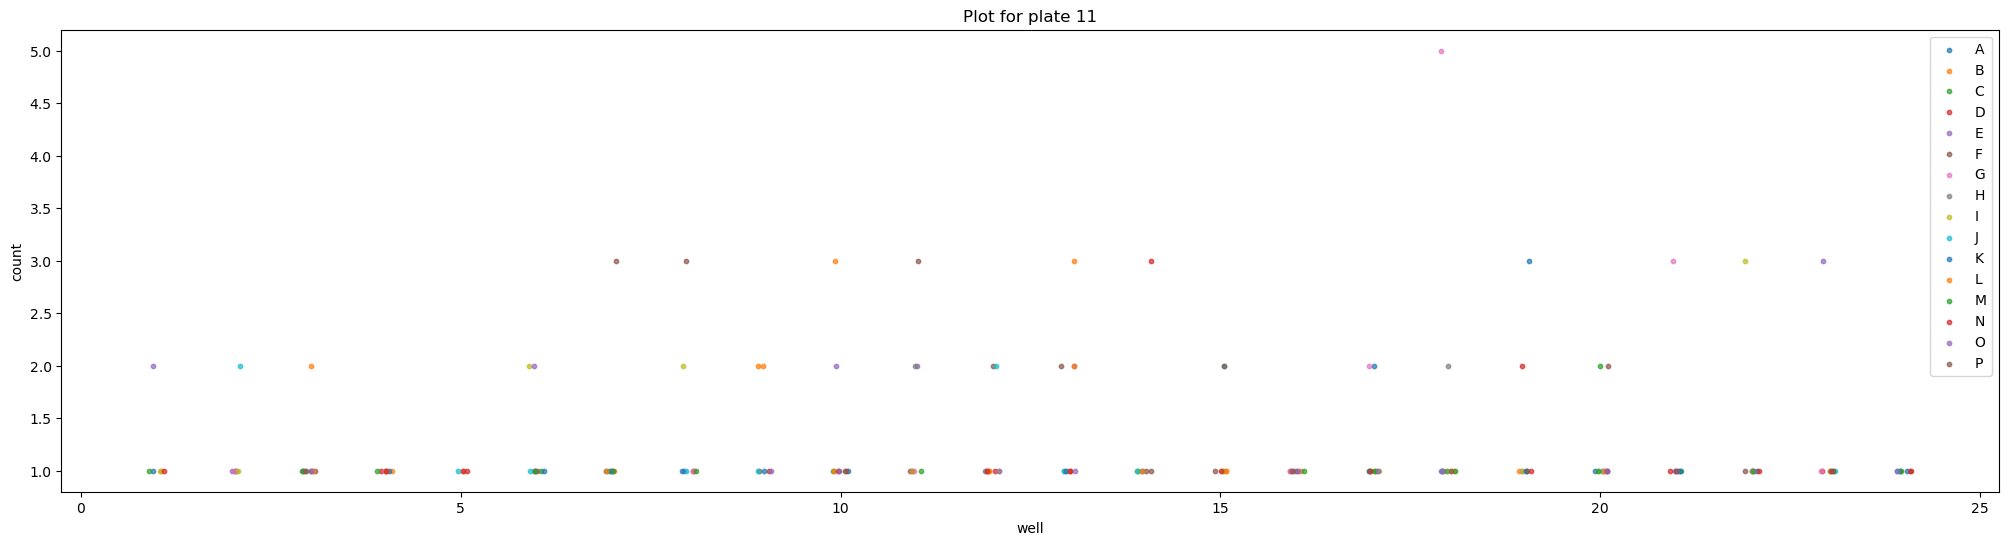

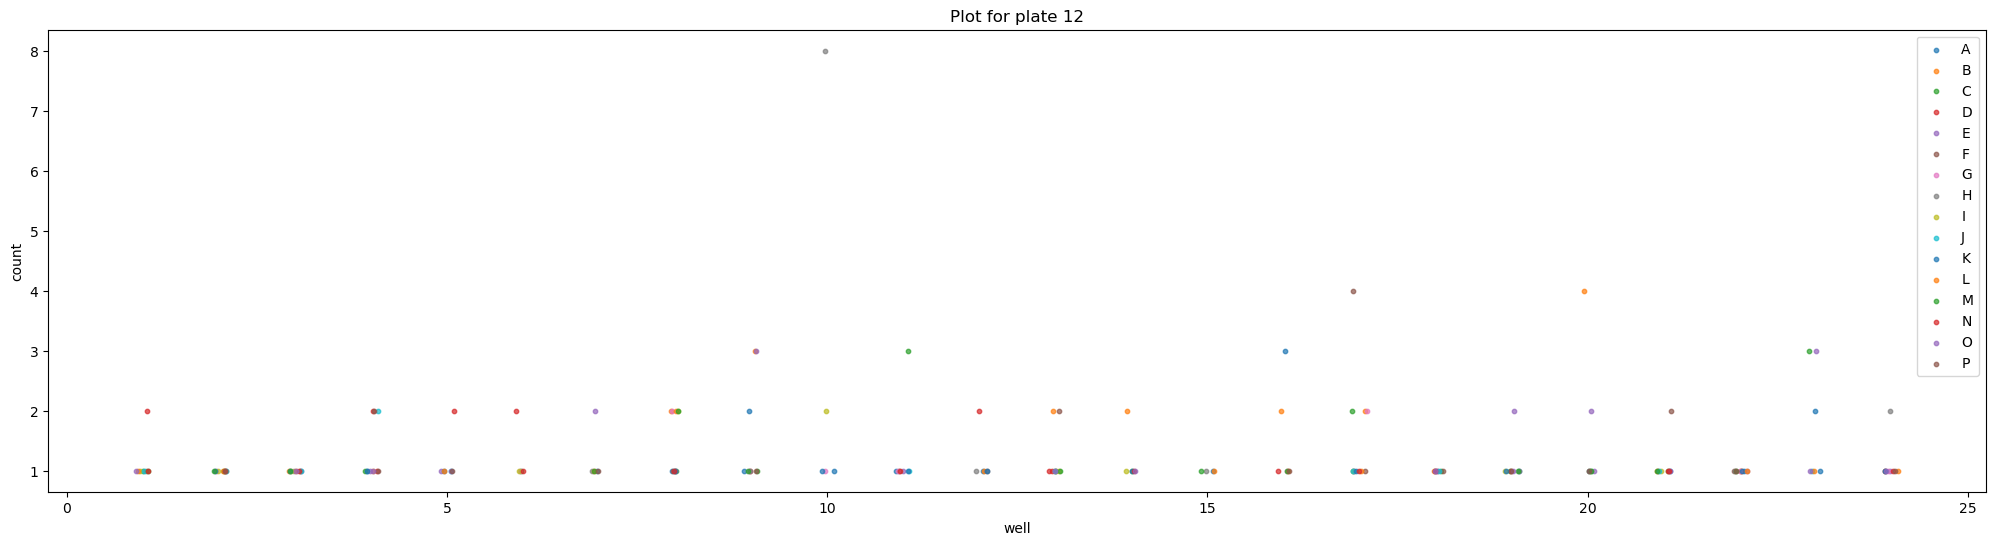

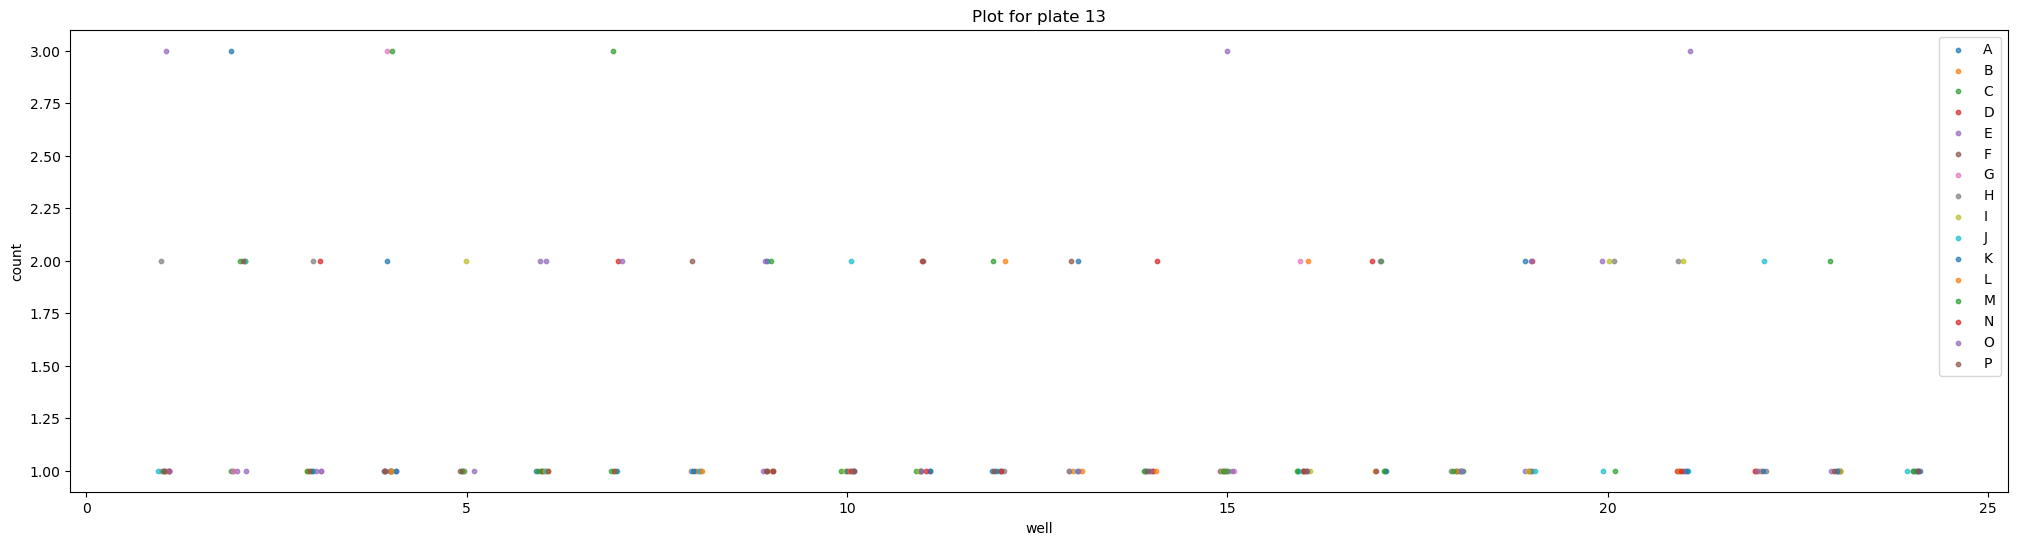

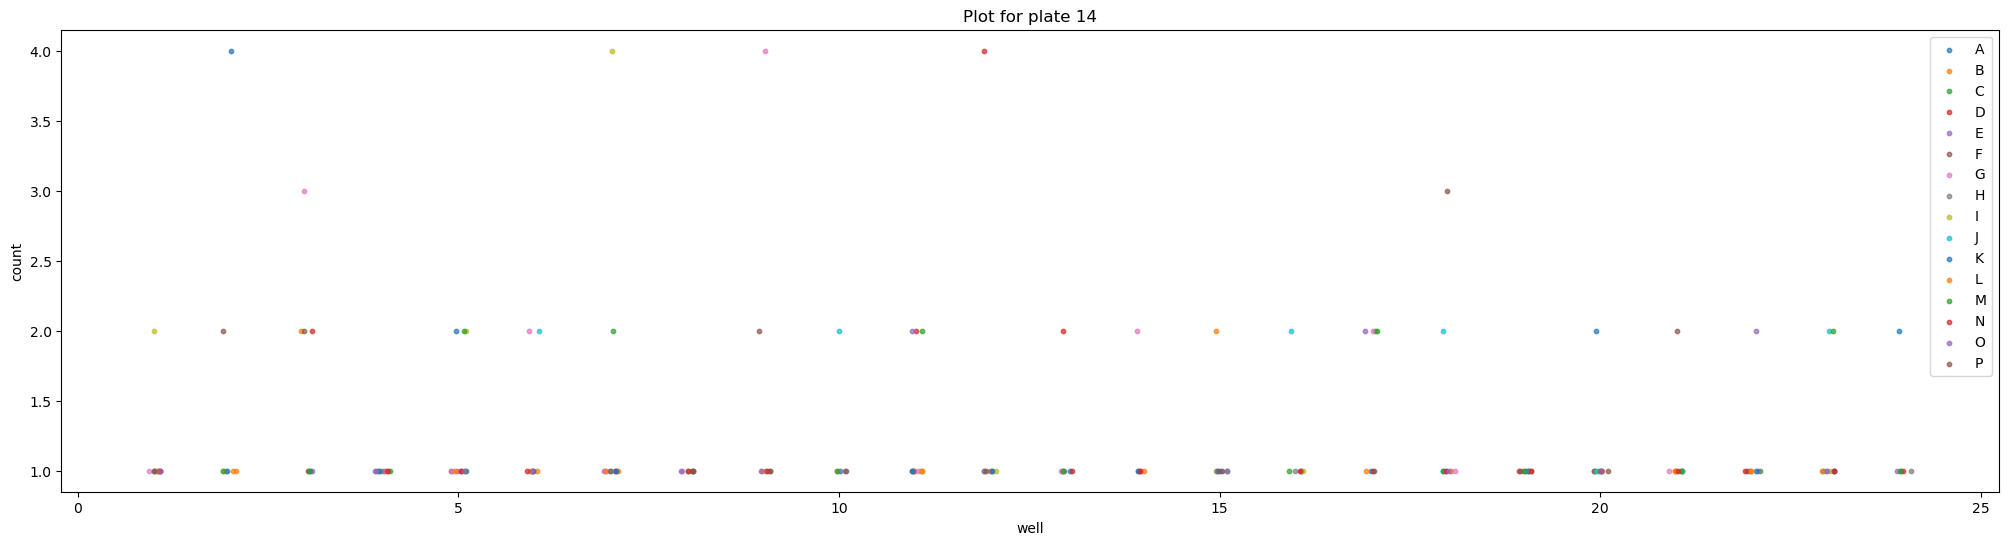

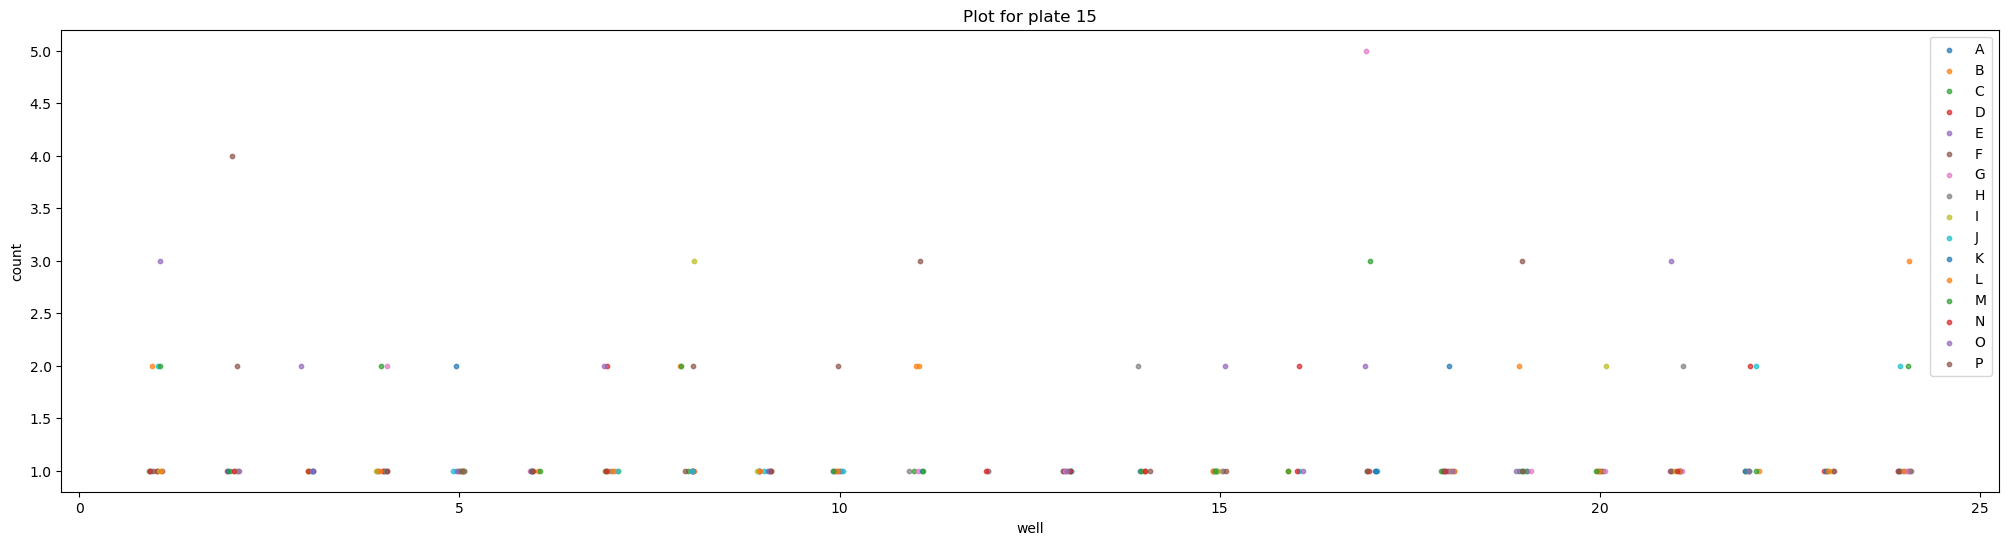

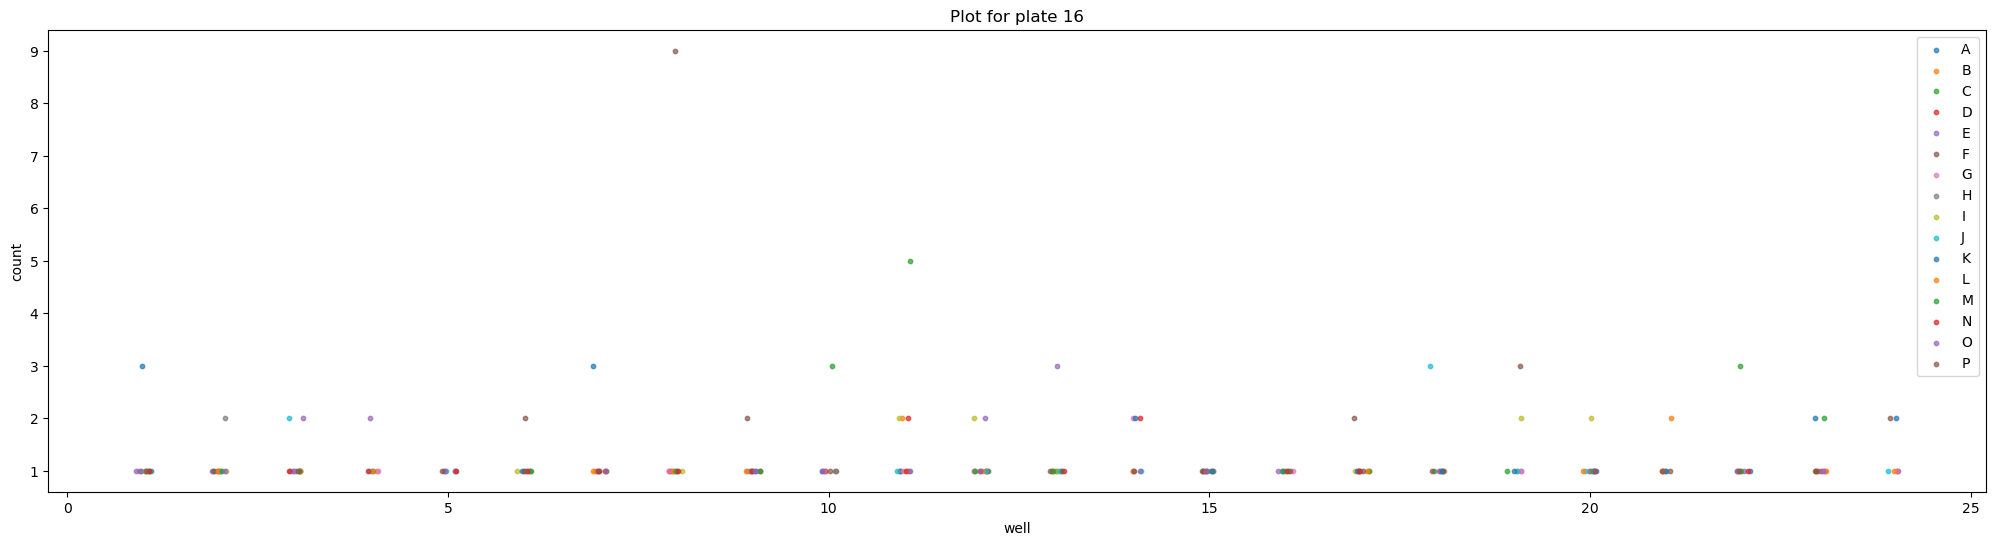

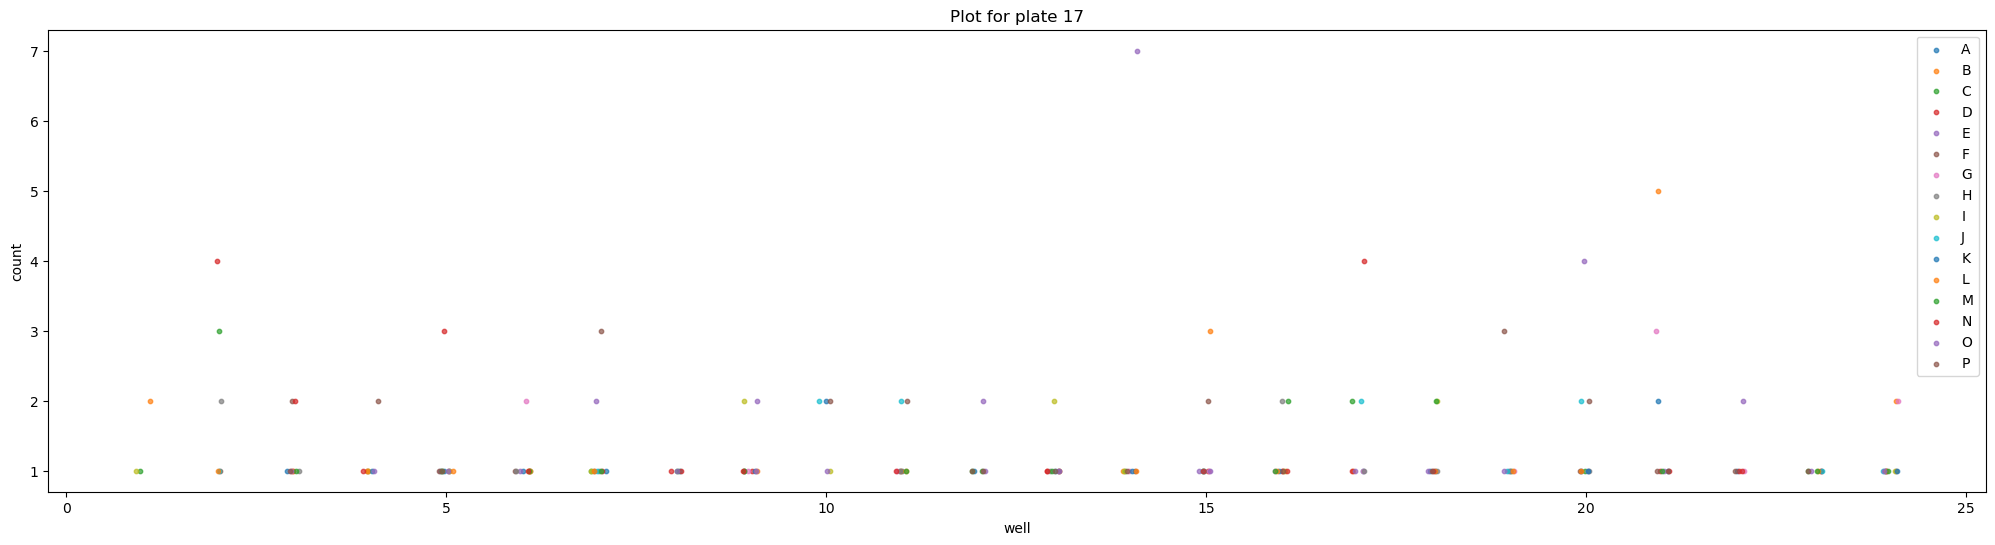

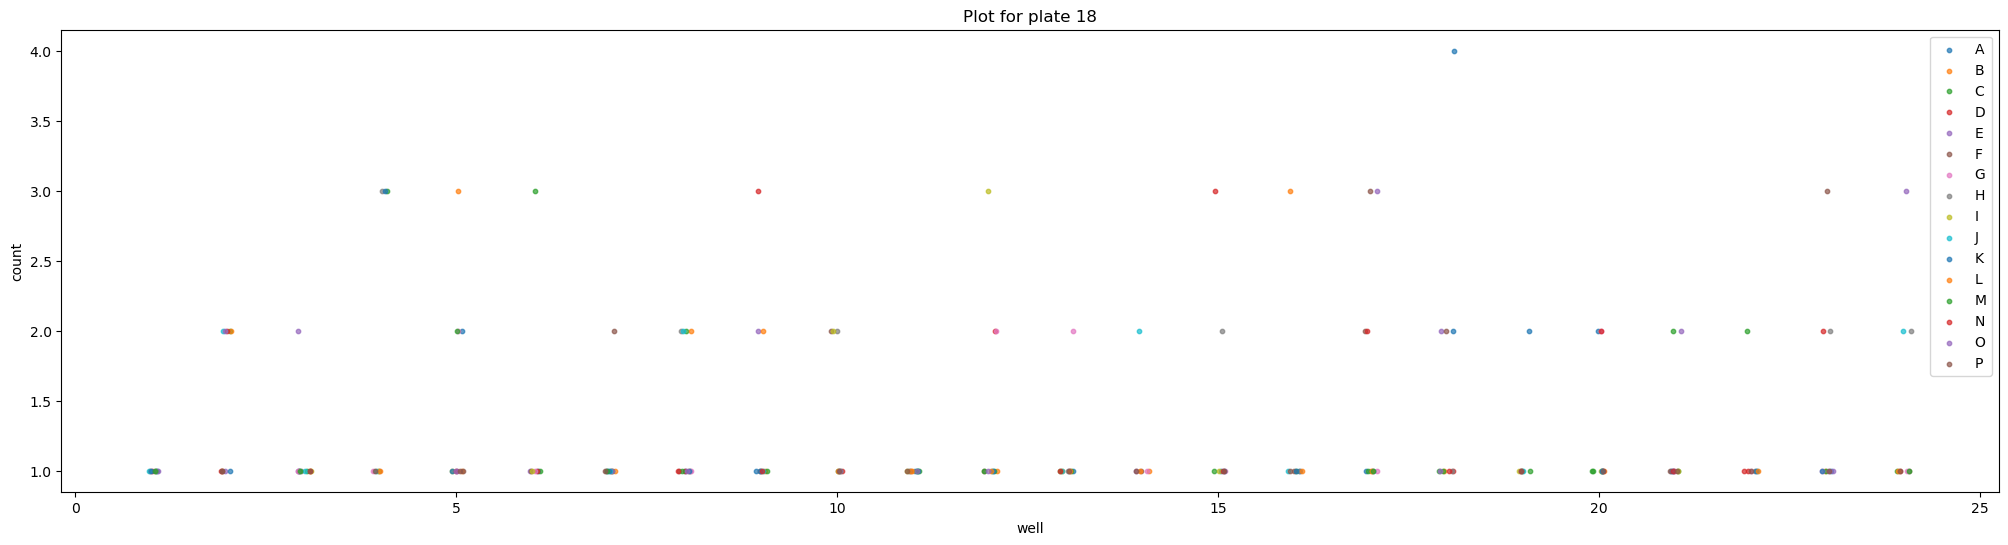

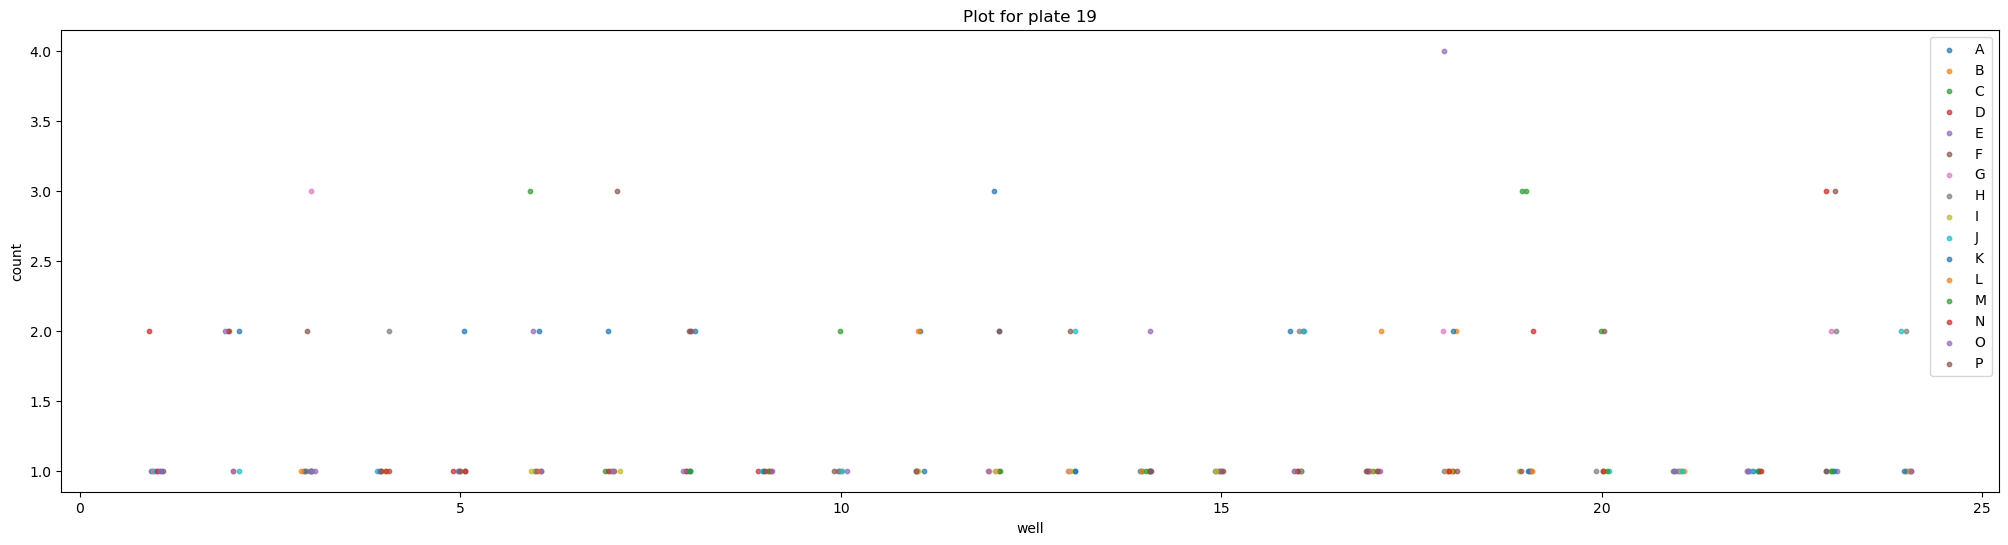

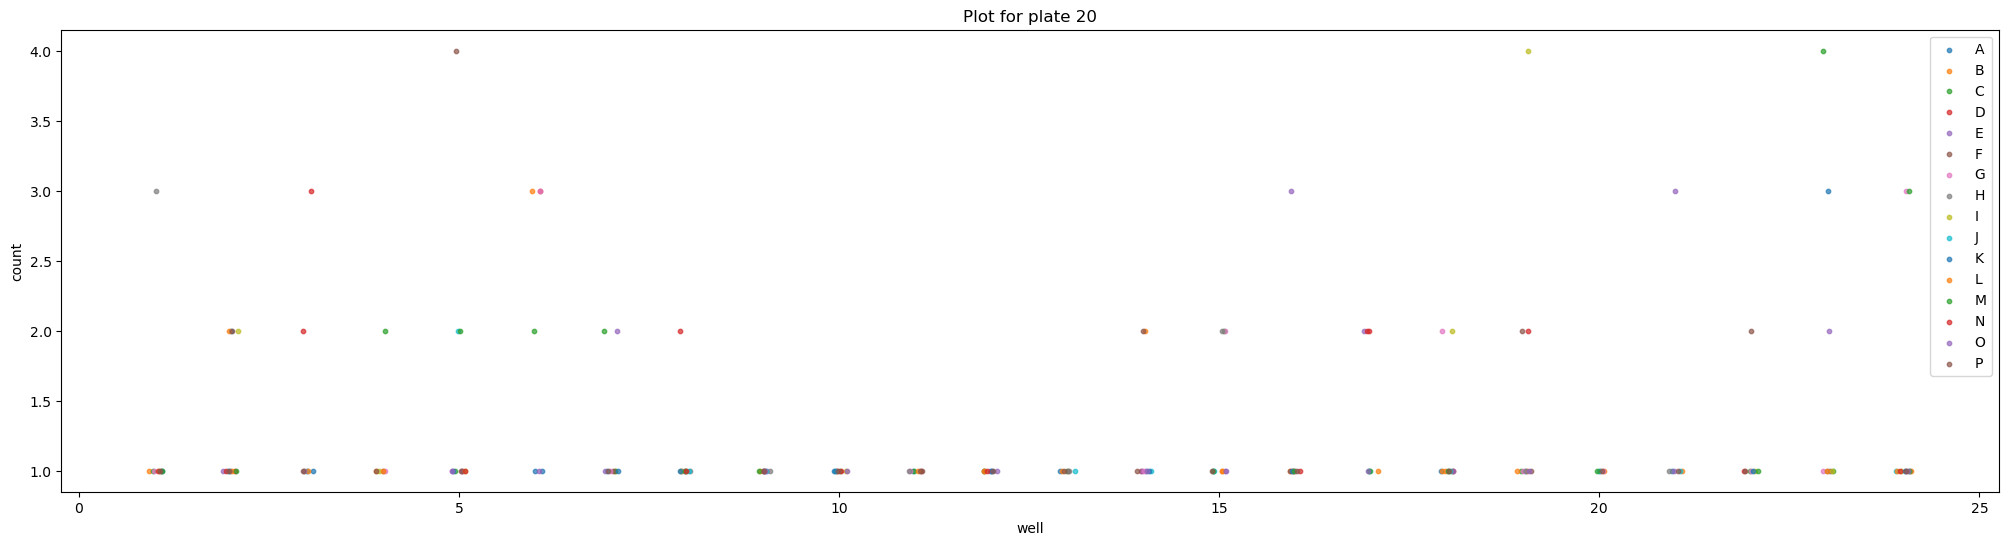

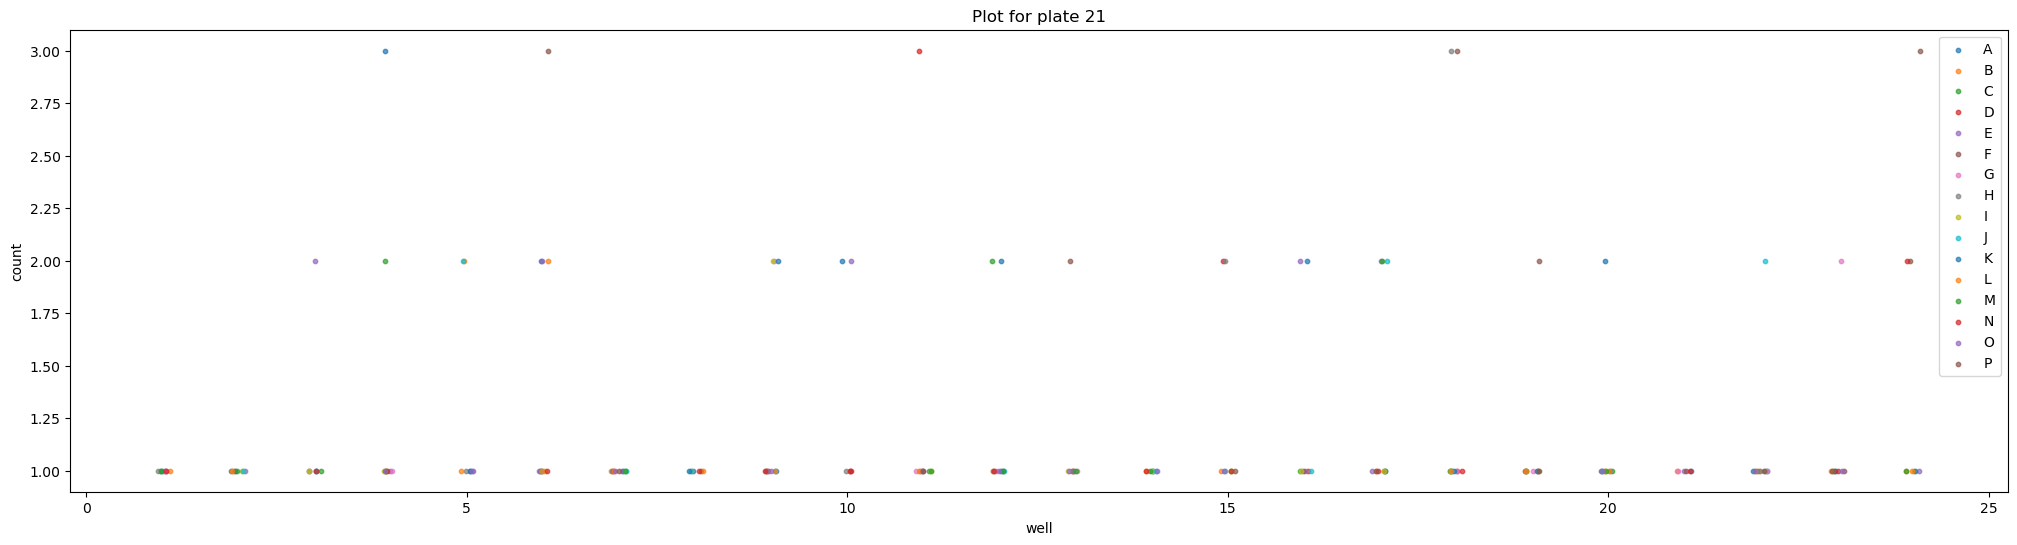

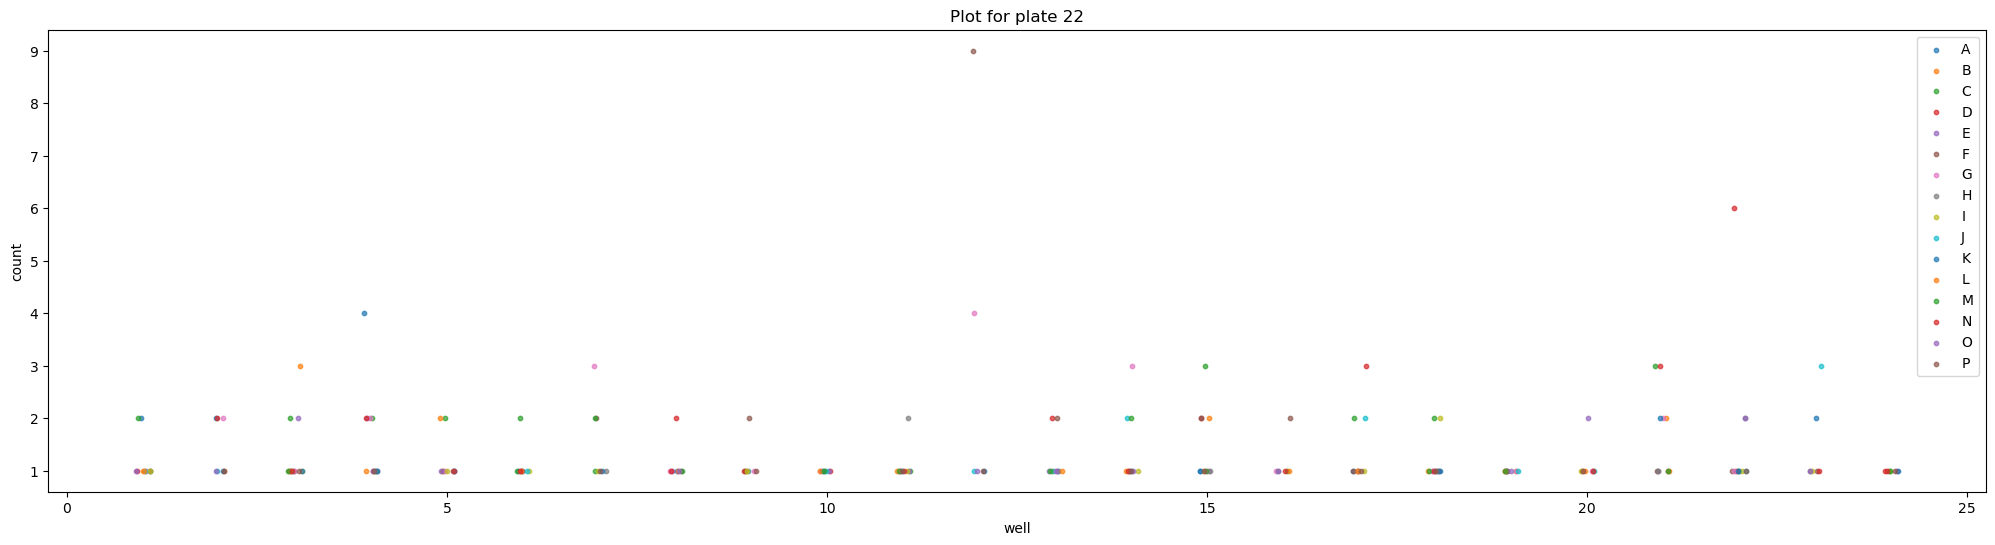

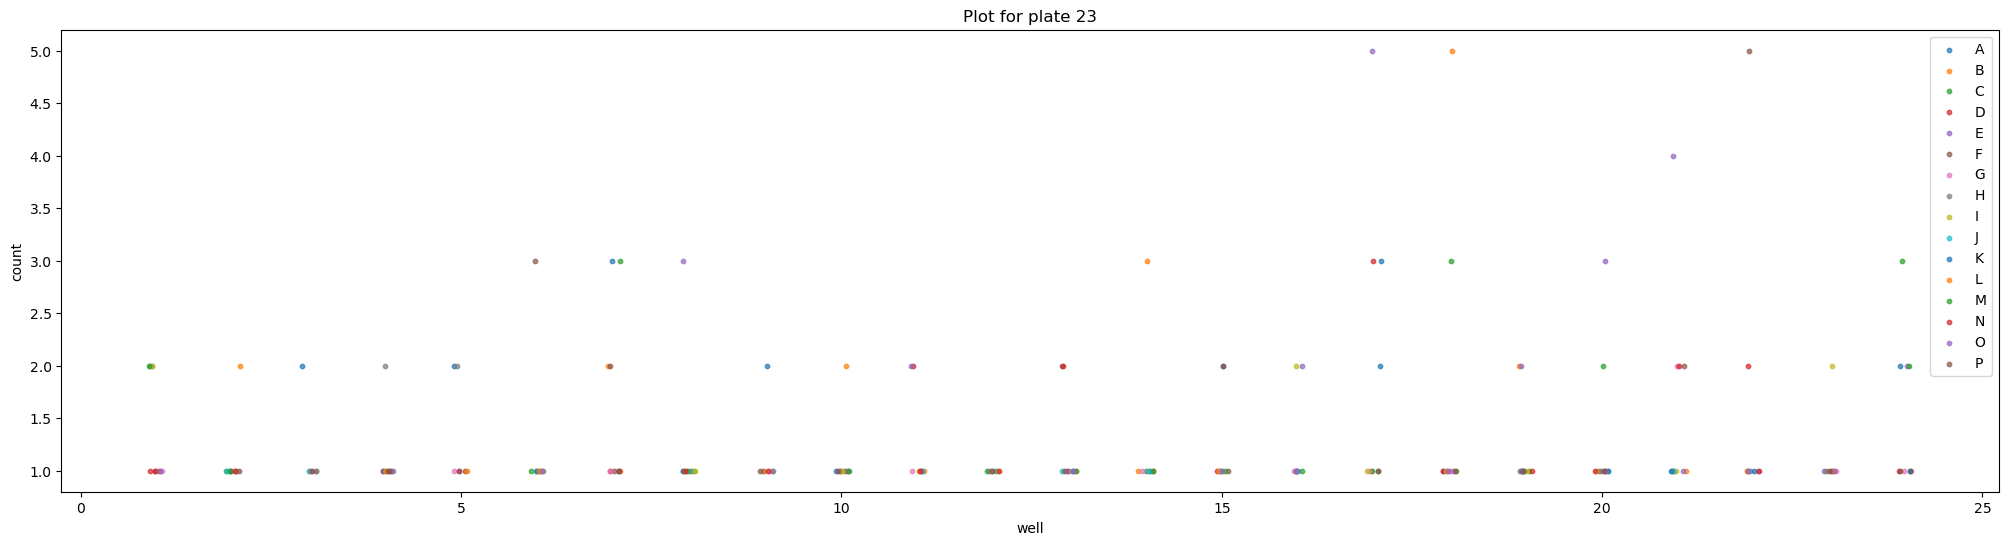

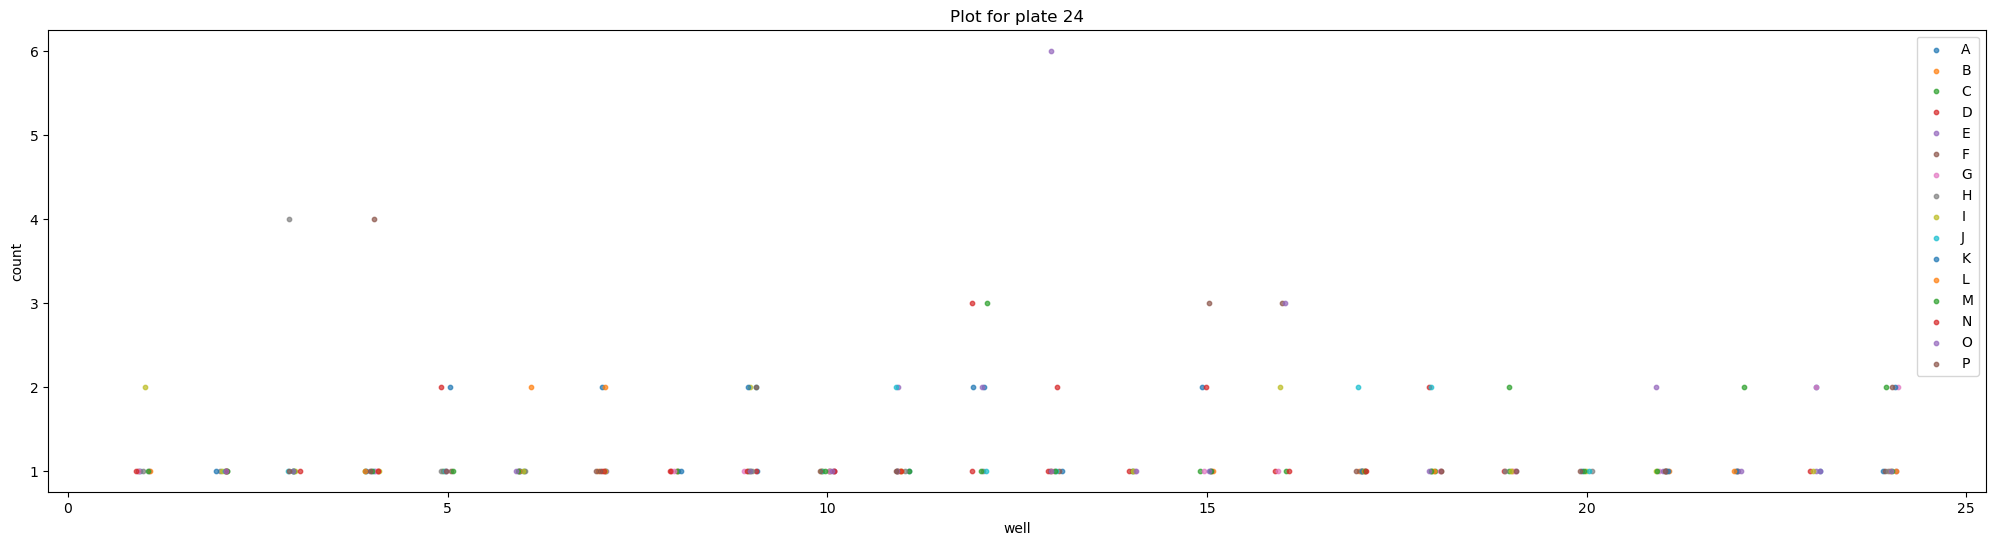

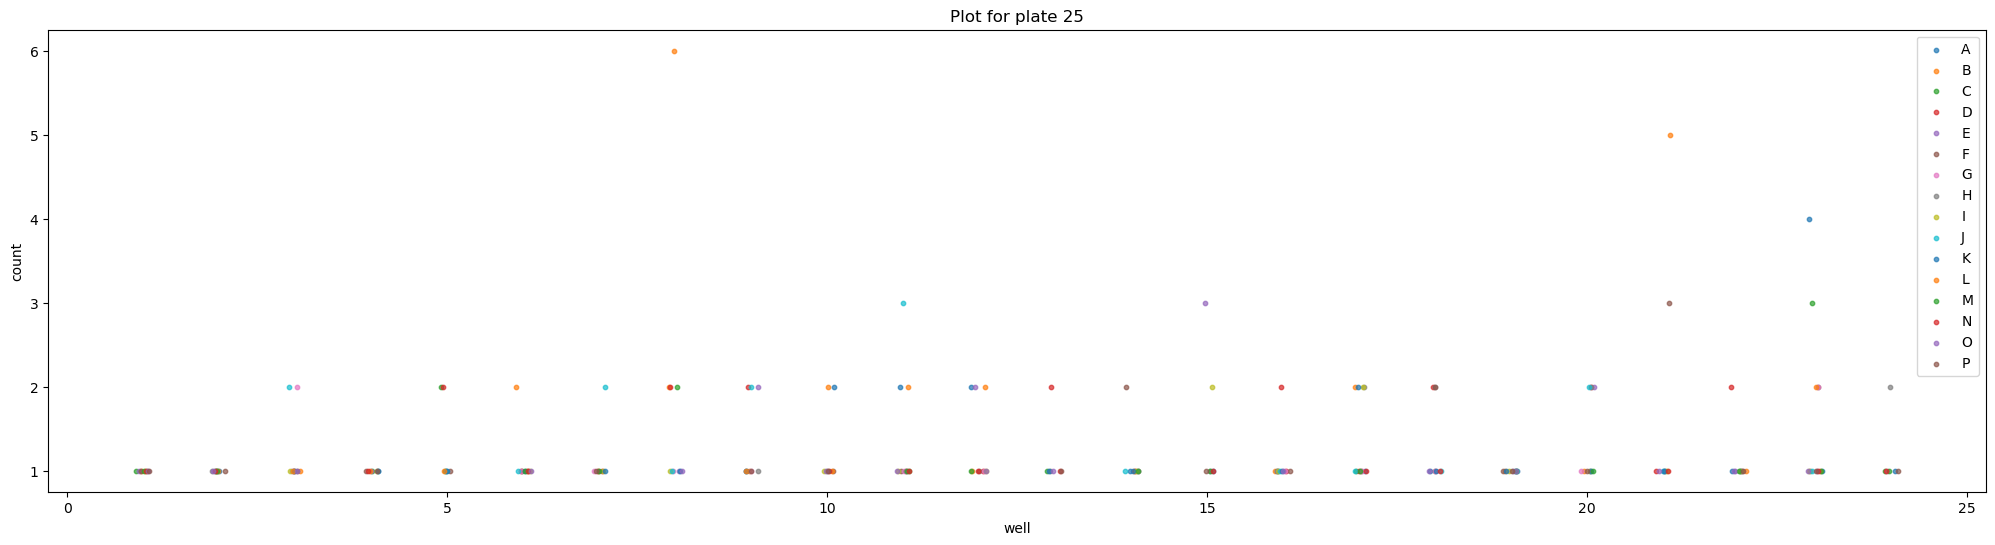

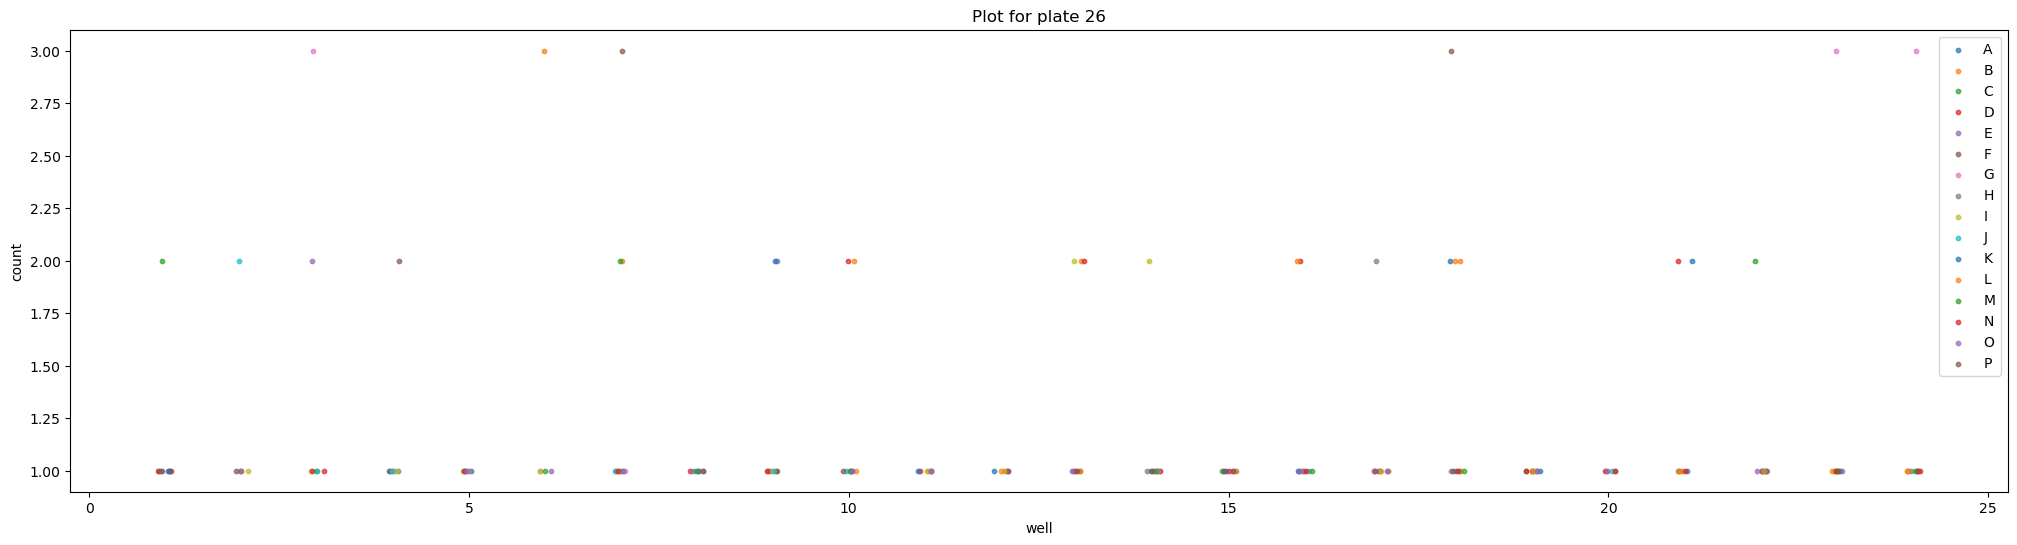

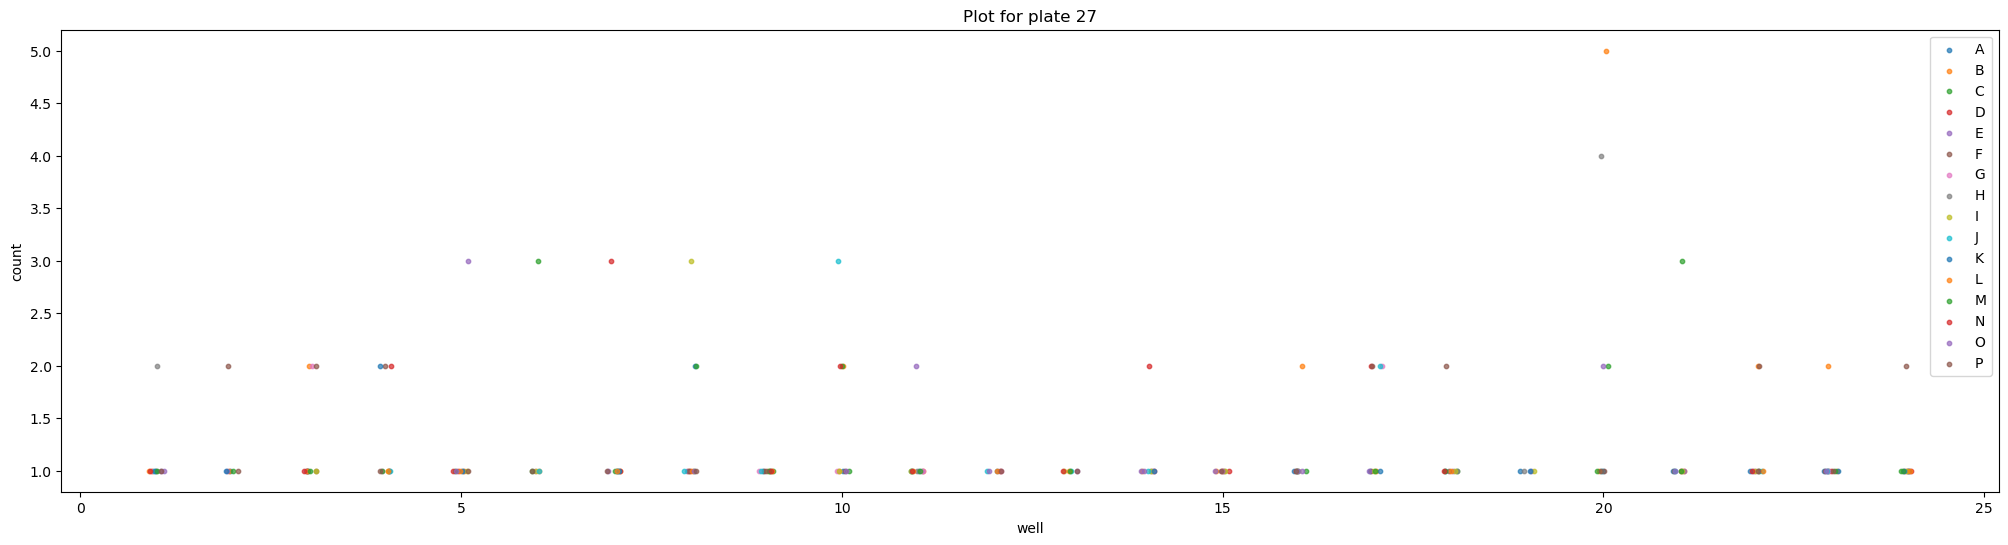

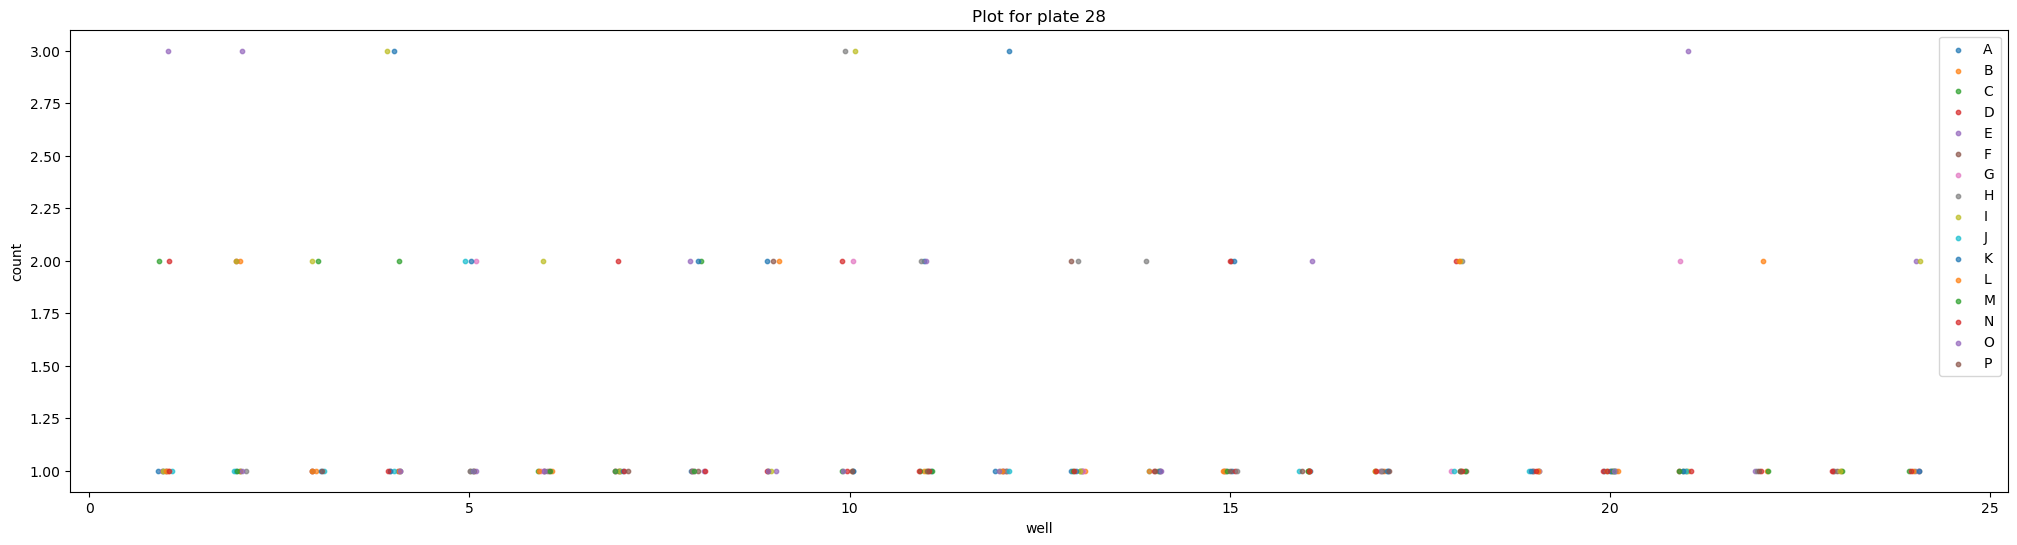

In [ ]:
for key, df in grouped3dfs.items():
    indvWell= df.groupby('wellLet')
    plt.figure(figsize=(25, 6))
    #plt.scatter(df['well'],df['count'])
    plt.xlabel('well')
    plt.ylabel('count')
    plt.title(f'Plot for plate {key}')
    for group_name, group_data in indvWell:  
        x_values = group_data['wellNo']
        y_values = group_data['count']
        noise = np.random.uniform(low=-0.1, high=0.1, size=len(x_values))
        shifted_x = x_values + noise
        plt.scatter(shifted_x, y_values, label=group_name, alpha=0.7, s=10)
        #plt.plot(shifted_x, y_values, label=group_name, alpha=0.7)
        x_label = x_values.iloc[-1]
        y_label = y_values.iloc[-1]
        #plt.text(x_label, y_label, group_name, ha='center', va='center')
    plt.legend()
    plt.show()

## Plot readcounts per well per plate

In [ ]:
for key, df in grouped3dfs.items():
    indvWell= df.groupby('wellLet')
    for group_name, group_data in indvWell:  
        plt.figure(figsize=(25, 6))
        #plt.scatter(df['well'],df['count'])
        plt.xlabel('well')
        plt.ylabel('count')
        plt.title(f'Plot for plate {key}')
        x_values = group_data['wellNo']
        y_values = group_data['count']
        noise = np.random.uniform(low=-0.1, high=0.1, size=len(x_values))
        shifted_x = x_values + noise
        plt.scatter(shifted_x, y_values, label=group_name, alpha=0.7, s=10)
        plt.xticks(range(1, 25))
        #plt.plot(shifted_x, y_values, label=group_name, alpha=0.7)
        x_label = x_values.iloc[-1]
        y_label = y_values.iloc[-1]
        #plt.text(x_label, y_label, group_name, ha='center', va='center')
        plt.legend()
        plt.show()

## Plot a heatmap

In [ ]:
# Create an empty dataframe to store the concatenated pivot data
concatenated_pivot_data = pd.DataFrame()

# Iterate over the grouped data
for key, df in grouped3dfs.items():
    indvWell = df.groupby('wellLet')
    # Iterate over each group
    for group_name, group_data in indvWell:
        #print(group_data)
        pivot_data = group_data.pivot_table(index='wellLet', columns='wellNo', values='count')
        pivot_data = pivot_data.reindex(columns=np.arange(1, 25))
        pivot_data = pivot_data.fillna(0)
        #print(pivot_data)
    # Add the pivot data to the concatenated dataframe
        concatenated_pivot_data = pd.concat([concatenated_pivot_data, pivot_data])
        #print(concatenated_pivot_data)
# Plot the heatmap for the concatenated pivot data
    #plt.figure(figsize=(10, 8))
    sns.heatmap(concatenated_pivot_data, cmap='Greens', annot=True, vmin=0, vmax=5)
    plt.xlabel('wellNo')
    plt.ylabel('well')
    plt.title(key)
    plt.show()
    concatenated_pivot_data = pd.DataFrame()

# 5'

In [ ]:
dfclean5 = df5.copy()
#keep this order because I went through the output file individually to determine these lines
dfclean5 = dfclean5[~dfclean5.index.isin(range(33482, 33797))] #122
dfclean5 = dfclean5[~dfclean5.index.isin(range(34747, 35652))] #126, 127, 128
dfclean5 = dfclean5[~dfclean5.index.isin(range(35930, 36501))] #130, 131
dfclean5 = dfclean5[~dfclean5.index.isin(range(36770, 37054))] #133
dfclean5 = dfclean5[~dfclean5.index.isin(range(38773, 39015))] #140
dfclean5 = dfclean5[~dfclean5.index.isin(range(39325, 39543))] #142
dfclean5 = dfclean5[~dfclean5.index.isin(range(40030, 40626))] #145, 146
dfclean5 = dfclean5[~dfclean5.index.isin(range(46853, 49718))] #170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182
dfclean5 = dfclean5[~(dfclean5.index >= 115849)] #the rest

pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Disable column width wrapping

# Print the entire dataframe
#print(dfclean5)
#dfclean2.to_excel('C:/Users/Administrator/Desktop/dfclean5.xlsx', index=False)

In [ ]:
unique_sequences = set()
# Iterate over the DNA sequence column and add each unique sequence to the set
for sequence in dfclean5['IB']:
    if sequence not in unique_sequences:
        unique_sequences.add(sequence)

# Print the number of unique sequences
print(f"There are {len(unique_sequences)} unique DNA sequences in the 'dna_sequence' column.")

## generate dict of dataframes, one for each plate, showing count per well

In [ ]:
# Group the dataframe by 'plate' and 'well' and count the occurrences
grouped5 = dfclean5.groupby(['plate', 'well']).size()
grouped5df = grouped5.reset_index().rename(columns={0:'count'})
#print(type(grouped3df))
#print(grouped3df.columns)
#print(grouped3)

In [ ]:
grouped5df['wellLet'] = grouped5df['well'].str.extract('([A-Za-z]+)')
grouped5df['wellLet2'] = grouped5df['well'].str.extract('([A-Za-z]+)')
grouped5df['wellNo'] = grouped5df['well'].str.extract('(\d+)').astype(int)
grouped5df['platenum'] = grouped5df['plate'].str.extract('(\d+)').astype(int)
print(grouped5df.columns)


In [ ]:
grouped5dfs = {}
for pattern, group in grouped5df.groupby('platenum'):
    grouped5dfs[pattern] = group
#print(grouped3dfs)
print(type(grouped5dfs))

## Plot readcounts per plate

In [ ]:
for key, df in grouped5dfs.items():
    indvWell= df.groupby('wellLet')
    plt.figure(figsize=(25, 6))
    #plt.scatter(df['well'],df['count'])
    plt.xlabel('well')
    plt.ylabel('count')
    plt.title(f'Plot for plate {key}')
    for group_name, group_data in indvWell:  
        x_values = group_data['wellNo']
        y_values = group_data['count']
        noise = np.random.uniform(low=-0.1, high=0.1, size=len(x_values))
        shifted_x = x_values + noise
        plt.scatter(shifted_x, y_values, label=group_name, alpha=0.7, s=10)
        #plt.plot(shifted_x, y_values, label=group_name, alpha=0.7)
        x_label = x_values.iloc[-1]
        y_label = y_values.iloc[-1]
        #plt.text(x_label, y_label, group_name, ha='center', va='center')
    plt.legend()
    plt.show()

## Plot readcounts per well per plate

In [ ]:
for key, df in grouped5dfs.items():
    indvWell= df.groupby('wellLet')
    for group_name, group_data in indvWell:  
        plt.figure(figsize=(25, 6))
        #plt.scatter(df['well'],df['count'])
        plt.xlabel('well')
        plt.ylabel('count')
        plt.title(f'Plot for plate {key}')
        x_values = group_data['wellNo']
        y_values = group_data['count']
        noise = np.random.uniform(low=-0.1, high=0.1, size=len(x_values))
        shifted_x = x_values + noise
        plt.scatter(shifted_x, y_values, label=group_name, alpha=0.7, s=10)
        plt.xticks(range(1, 25))
        #plt.plot(shifted_x, y_values, label=group_name, alpha=0.7)
        x_label = x_values.iloc[-1]
        y_label = y_values.iloc[-1]
        #plt.text(x_label, y_label, group_name, ha='center', va='center')
        plt.legend()
        plt.show()

## Plot a heatmap

In [ ]:
# Create an empty dataframe to store the concatenated pivot data
concatenated_pivot_data = pd.DataFrame()

# Iterate over the grouped data
for key, df in grouped3dfs.items():
    indvWell = df.groupby('wellLet')
    # Iterate over each group
    for group_name, group_data in indvWell:
        #print(group_data)
        pivot_data = group_data.pivot_table(index='wellLet', columns='wellNo', values='count')
        pivot_data = pivot_data.reindex(columns=np.arange(1, 25))
        pivot_data = pivot_data.fillna(0)
        #print(pivot_data)
    # Add the pivot data to the concatenated dataframe
        concatenated_pivot_data = pd.concat([concatenated_pivot_data, pivot_data])
        #print(concatenated_pivot_data)
# Plot the heatmap for the concatenated pivot data
    #plt.figure(figsize=(10, 8))
    sns.heatmap(concatenated_pivot_data, cmap='Greens', annot=True, vmin=0, vmax=5)
    plt.xlabel('wellNo')
    plt.ylabel('well')
    plt.title(key)
    plt.show()
    concatenated_pivot_data = pd.DataFrame()